# Libraries & Packages

In [1]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


import random
import numpy as np
import pandas as pd
import time
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 5000)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn import model_selection

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Datetime
from datetime import datetime
from datetime import timedelta
from sklearn import metrics

# Handle warnings (during execution of code)
import warnings
warnings.simplefilter("ignore")

import pickle
from sklearn.externals import joblib

# Display and visualization related libraries
from IPython.display import display, HTML
pd.options.display.max_rows= 5000
pd.options.display.max_columns= 5000


# Psycopg is the most popular PostgreSQL database adapter for the Python programming language
import psycopg2

# Functions

In [5]:
def treat_inf(dataset):
    dataset.replace({np.inf:0,-np.inf:0,'inf':0,float('inf'):0},inplace = True)
    return dataset



# outlier_headers is present inside the data_preprocessing_functions
def treatna(dataset,type=0):
    if type ==0:
        dataset.fillna(0,inplace= True)
    elif type == 'mean':
        inf_df = infer_schema(dataset,ret_inference= True)
        continuos_values = inf_df[inf_df.number_of_classes>11].feature_name.values
        dataset[continuos_values] = dataset[continuos_values].fillna(dataset[continuos_values].mean())
    elif type == 'mode':
        inf_df = infer_schema(dataset,ret_inference= True)
        categorical = inf_df[inf_df.number_of_classes<=11].feature_name.values        
        for col in categorical:
            model_dataset[col] = model_dataset[col].fillna(model_dataset[col].value_counts().index[0])
    else:
        pass

    return dataset


def infer(series):
    temp = series.apply(lambda x:evaluation(x)).dtype
    return temp

def infer_schema(dataset,apply_schema = False, ret_inference =False):
    df_dtypes_unique_classses = pd.DataFrame([(col,dataset[col].dtype,dataset[col].unique().shape[0],infer(dataset[col])) for col in dataset],columns = ['feature_name','data_type','number_of_classes','suggested_dtype'])
    display(df_dtypes_unique_classses)
    if apply_schema:
        dict_ = df_dtypes_unique_classses[['feature_name','suggested_dtype']].set_index('feature_name').to_dict()['suggested_dtype']
        dataset = dataset.astype(dict_)
        return dataset
    if ret_inference:
        return df_dtypes_unique_classses


def treatna(dataset,type=0):
    if type ==0:
        dataset.fillna(0,inplace= True)
    elif type == 'mean':
        inf_df = infer_schema(dataset,ret_inference= True)
        continuos_values = inf_df[inf_df.number_of_classes>11].feature_name.values
        dataset[continuos_values] = dataset[continuos_values].fillna(dataset[continuos_values].mean())
    elif type == 'mode':
        inf_df = infer_schema(dataset,ret_inference= True)
        categorical = inf_df[inf_df.number_of_classes<=11].feature_name.values        
        for col in categorical:
            model_dataset[col] = model_dataset[col].fillna(model_dataset[col].value_counts().index[0])
    else:
        pass

    return dataset


##### Validation Metric    #####

def gini_calc(actual,prediction):
    return (2*roc_auc_score(list(actual), prediction))-1


def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1

    return(TP, FP, TN, FN)



def Capture_curve(y_test,preds,gini,title):
    from sklearn.metrics import auc, roc_curve
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    rate = []
    for i in threshold:
        T = perf_measure(list(y_test),[1 if j >= i else 0 for j in preds])
        rate.append(T[0]+T[1])
    rate2 = [i/len(test) for i in rate]
    plt.figure(figsize=[12,12])
    plt.plot(rate2, tpr, label='Gini {}'.format(gini) % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Sphonic Triggered proportion', fontsize=18)
    plt.ylabel('Captured out of total rejects proportion', fontsize=18)
    plt.title('Capture plot for {}'.format(title), fontsize=18)
    plt.legend(loc="lower right",prop={'size':30})
    plt.show()
    
    
def plot_roc_curve(y_test,preds,title): 
    
    import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

# method I: plt
    import matplotlib.pyplot as plt
    plt.figure(figsize=[12,12])
    plt.title('ROC Curve for {}'.format(title), fontsize=18)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right',prop={'size':30})
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.show()   
    





# Data Load

In [ ]:
# Master data
df_master_data = pd.read_csv('s3://master_data_folder/master_data.csv', encoding='latin-1')


In [ ]:
# Negative List
xls = pd.ExcelFile('s3://master_data_folder/NegListJulyAugust.xlsx')
Neg_list = pd.read_excel(xls, 'NegListReject2019')


In [5]:
# Hard Policy
df_hard_policy=pd.read_csv('s3://master_data_folder/credit_hard_policy_reject.csv')


In [6]:
# Gen 6.5 score
df_gen65_score=pd.read_csv('s3://master_data_folder//Gen6_5_top_scores_created_at_all_PGs_+-30.csv')
print(df_gen65_score.shape)
df_gen65_score_analysis=pd.read_csv('s3://master_data_folder/playground.ccds_analysis_data_gen65.csv')
print(df_gen65_score_analysis.shape)
df_gen65_score_monitoring=pd.read_csv('s3://master_data_folder/uk6.5.monitoring.sample201907_gen65.csv')
print(df_gen65_score_monitoring.shape)

(229303, 43)
(317583, 3)
(74757, 3)


# Exclusion Logic

# Below is the exclusion logic and serial wise flow 
'''
COA ('18H2-'19H1)
Test Application
Gen6.5 HR
Sphonic Pass
Credit Hard Policy
Negative List (Part of EDD)
Purely EDDs
Final sample for train and test
'''

### COA ('18H2-'19H1)

In [8]:
H22018_H12019=df_master_data_updated.loc[(df_master_data_updated['created_at']>='2018-07-01')&(df_master_data_updated['created_at']<='2019-06-30')]
H22018_H12019.shape

(86794, 737)

### Test Application

In [9]:
Internal_IPs=['5.148.48.186',
'5.148.48.187',
'5.148.48.188',
'5.148.48.189',
'5.148.48.190',
'5.148.67.82',
'5.148.67.83',
'5.148.67.84',
'5.148.67.85',
'5.148.67.86']

H22018_H12019_TestApp=H22018_H12019[~H22018_H12019.TrueIp.isin(Internal_IPs)]
H22018_H12019_TestApp.shape

(86643, 737)

### Gen 6.5 HR

In [10]:
H22018_H12019_TestApp_Gen65HR=H22018_H12019_TestApp.loc[H22018_H12019_TestApp['gen65_band']!='HR']
H22018_H12019_TestApp_Gen65HR.shape

(74321, 737)

### Sphonic Pass

In [11]:
H22018_H12019_TestApp_Gen65HR_sphonic=H22018_H12019_TestApp_Gen65HR.loc[H22018_H12019_TestApp_Gen65HR['sphonic_trig_flag']==1]
H22018_H12019_TestApp_Gen65HR_sphonic.shape


(4394, 737)

### Credit Hard Policy

In [12]:
# Merge the datasets
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy=pd.merge(H22018_H12019_TestApp_Gen65HR_sphonic,df_hard_policy[['application_uuid','hard.policy.flag']],how='left',on='application_uuid')
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy.shape


(4394, 738)

In [13]:
# Impute null values for hard.policy.flag
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy['hard.policy.flag'].fillna(0,inplace=True)

In [14]:
# Filter all the non-hard_policy flagged apps
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_merge=H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy.loc[H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy['hard.policy.flag']!=1]
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_merge.shape


(4252, 738)

### EDDs (2019 Negative List + Purely EDDs)

In [15]:
# Merge the datasets
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList = pd.merge(H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_merge,Neg_list[['application_uuid','Opportunity ID']],how='left',on='application_uuid')
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList.shape


(4252, 739)

In [16]:
# Impute null values for Opportunity ID
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList['Opportunity ID'].fillna(0,inplace=True)

In [17]:
# Filter all the non-negative list apps
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList_merge=H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList.loc[H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList['Opportunity ID']==0]
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList_merge.shape


(4191, 739)

In [18]:
# Purely EDD Apps List
EDD_Apps_List=['3f98bec4-6217-44af-98be-4afee962d678',
 '726cb32d-d128-4cdd-bf6a-5fa507f29df9',
 '1ef805f7-4b0b-4a55-827c-be6b0f126cf6',
 'f4e1b1cc-26c5-403d-88d9-dd532fcf6c57',
 '59e2bc22-7750-49fb-bc96-1782bc58b95d',
 'd43d0b47-4b3f-4239-966e-319fe6cb2a81',
 'a5e28299-1a90-4931-9b33-c3487954e33a',
 '266229f0-86eb-4824-a7b1-b66af166f7cb',
 'c3493e8b-3049-4f47-8ec4-340b7a79db60']

In [19]:
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList_PurelyEDD=H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList_merge[~H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList_merge.application_uuid.isin(EDD_Apps_List)]
H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList_PurelyEDD.shape

(4182, 739)

### Final Sample for Train and Test

In [20]:
H22018_H12019_amt_req_nofilter=H22018_H12019_TestApp_Gen65HR_sphonic_hardpolicy_NegList_PurelyEDD.copy()
H22018_H12019_amt_req_nofilter.shape


(4182, 739)

# Feature Creation

### SIC Code

In [21]:
def sic_code_prefix(x):
    try:
        return int(str(x)[:2])
    except:
        return x
    
def prepare_sic_code(x):
    try:
        if x == 1 or x == 2:
            return 'Agriculture And Forestry'
        elif x == 5:
            return 'Fishing'
        elif x >= 10 and x <= 14:
            return 'Mining And Quarrying'
        elif x == 22:
            return 'Publishing'
        elif x == 37:
            return 'Recycling'
        elif x >= 40 and x <= 41:
            return 'Electricity'
        elif x  >= 50 and x <= 51:
            return 'Wholesale'
        elif x == 52:
            return 'Retail'
        elif x == 55:
            return 'Hotels'
        elif x >= 60 and x <= 64:
            return 'Transport'
        elif x >= 65 and x <= 67: 
            return 'Financial'
        elif x >= 70 and x <= 74:
            return 'Property'
        elif x == 75:
            return 'Public'
        elif x == 80:
            return 'Education'
        elif x == 85:
            return 'Health'
        elif x == 90:
            return 'Sewage'
        elif x == 91:
            return 'Other Community'
        elif x == 92:
            return 'Recreation'
        elif x == 93:
            return 'Other Service'
        elif x == 95:
            return "Private Households"
        elif x == 99:
            return "International"
        else:
            return 'Other'                      
    except:
        return x

In [22]:
# For whole population
H22018_H12019_amt_req_nofilter['sic_code_prefix'] = H22018_H12019_amt_req_nofilter['siccode1992'].apply(sic_code_prefix)


In [23]:
# For whole population
V = H22018_H12019_amt_req_nofilter['sic_code_prefix'].fillna('None')
T = V.apply(prepare_sic_code)
H22018_H12019_amt_req_nofilter['sic_code_categories'] = T

### FraudScore > 1000

In [24]:
H22018_H12019_amt_req_nofilter['FraudScore']=H22018_H12019_amt_req_nofilter['FraudScore'].replace(to_replace='None', value=0)
H22018_H12019_amt_req_nofilter['FraudScore']=H22018_H12019_amt_req_nofilter['FraudScore'].astype('float')

In [25]:
# For Whole population
H22018_H12019_amt_req_nofilter['FraudScore>1000'] = H22018_H12019_amt_req_nofilter['FraudScore'].apply(lambda x: 1 if x > 1000 else 0)



In [26]:
H22018_H12019_amt_req_nofilter.shape

(4182, 741)

## H1 2019 Dataset

In [27]:
# 2019 Data
H1_2019=H22018_H12019_amt_req_nofilter.loc[H22018_H12019_amt_req_nofilter['created_at']>='2019-01-01']
H1_2019.shape


(2475, 741)

In [28]:
# Reject_Count for 2019 Data

H1_2019_rej=H1_2019.loc[H1_2019['sphonic_rej_sf']==1]
H1_2019_rej.shape


(98, 741)

## H2 2018 Dataset

In [29]:
# 2018 Data
H2_2018=H22018_H12019_amt_req_nofilter.loc[(H22018_H12019_amt_req_nofilter['created_at']>='2018-07-01')&((H22018_H12019_amt_req_nofilter['created_at']<='2018-12-31'))]
H2_2018.shape

(1707, 741)

In [30]:
# Reject_Count for 2019 Data

H2_2018_rej=H2_2018.loc[H2_2018['sphonic_rej_sf']==1]
H2_2018_rej.shape

(86, 741)

## <=50k amount_requested

In [31]:
# 2019 train data
H1_2019_amt_req_ltet50k=H1_2019.loc[H1_2019['amount_requested']<=50000]
H1_2019_amt_req_ltet50k.shape


(1215, 741)

In [32]:
# Reject_Count for 2019 Data

H1_2019_amt_req_ltet50k_rej=H1_2019_amt_req_ltet50k.loc[H1_2019_amt_req_ltet50k['sphonic_rej_sf']==1]
H1_2019_amt_req_ltet50k_rej.shape


(48, 741)

In [33]:
# 2018 test data
H2_2018_amt_req_ltet50k=H2_2018.loc[H2_2018['amount_requested']<=50000]
H2_2018_amt_req_ltet50k.shape

(893, 741)

In [34]:
# Reject_Count for 2018 Data

H2_2018_amt_req_ltet50k_rej=H2_2018_amt_req_ltet50k.loc[H2_2018_amt_req_ltet50k['sphonic_rej_sf']==1]
H2_2018_amt_req_ltet50k_rej.shape


(51, 741)

# Feature Set

In [35]:
feature_set=['TrueIpLatitude',
'diff_domainAge',
'EAScore',
'PolicyScore',
'TrueIpLongitude',
'FraudScore',
'inventories',
'max_pg_cc',
'dl95_currbalance_m6',
'enq_90days',
'amount_pounds',
'discdeprcharges',
'dirs_avg_age',
'onclaccruals',
'totalcurrassets',
'IdentityIp',
'totalcurrlblts',
'dl95_numactiveaccs_m2',
'nr_pg',
'TrueIpScore',
'othcurrlblts',
'enq_own_90days',
'TrueIpWorstScore',
'full_time_employees',
'max_nr_mortgage',
'amount_requested',
'avg_nr_mnt_elect_roll_curr_addr',
'max_nr_mnt_elect_roll_curr_addr']

# Train & Test Datasets

In [36]:
train = H1_2019_amt_req_ltet50k
target = H1_2019_amt_req_ltet50k['sphonic_rej_sf']
test = H2_2018_amt_req_ltet50k

In [37]:
# Replace all None values for Features
train['FraudScore']=train['FraudScore'].replace(to_replace='None', value=0)

# Type cast the features for train and test datasets
train['FraudScore']=train['FraudScore'].astype('float')
train['totalhits']=train['totalhits'].astype('category')
train['EAScore']=train['EAScore'].astype('float')
train['EARiskBandID']=train['EARiskBandID'].astype('category')
train['bin_avg_callcredit_score']=train['bin_avg_callcredit_score'].astype('category')
train['bin_avg_pg_cc']=train['bin_avg_pg_cc'].astype('category')
train['bin_min_callcredit_score']=train['bin_min_callcredit_score'].astype('category')
train['bin_min_pg_cc']=train['bin_min_pg_cc'].astype('category')
train['IdentityCount']=train['IdentityCount'].astype('category')
train['IdentityIp']=train['IdentityIp'].astype('category')
train['EAAdviceID']=train['EAAdviceID'].astype('category')
train['IPMetroCode']=train['IPMetroCode'].astype('category')
train['IPRiskReasonId']=train['IPRiskReasonId'].astype('category')
train['sic_code_categories']=train['sic_code_categories'].astype('category')

In [38]:
# Replace all None values for Features
test['FraudScore']=test['FraudScore'].replace(to_replace='None', value=0)

# Type cast the features for test dataset
test['FraudScore']=test['FraudScore'].astype('float')
test['totalhits']=test['totalhits'].astype('category')
test['EAScore']=test['EAScore'].astype('float')
test['EARiskBandID']=test['EARiskBandID'].astype('category')
test['bin_avg_callcredit_score']=test['bin_avg_callcredit_score'].astype('category')
test['bin_avg_pg_cc']=test['bin_avg_pg_cc'].astype('category')
test['bin_min_callcredit_score']=test['bin_min_callcredit_score'].astype('category')
test['bin_min_pg_cc']=test['bin_min_pg_cc'].astype('category')
test['IdentityCount']=test['IdentityCount'].astype('category')
test['IdentityIp']=test['IdentityIp'].astype('category')
test['EAAdviceID']=test['EAAdviceID'].astype('category')
test['IPMetroCode']=test['IPMetroCode'].astype('category')
test['IPRiskReasonId']=test['IPRiskReasonId'].astype('category')
test['sic_code_categories']=test['sic_code_categories'].astype('category')

## Insample Train and Validation Datasets

In [39]:
# Insample train and validation split
X_train, X_test, y_train, y_test = train_test_split(train[feature_set], train['sphonic_rej_sf'], test_size=0.33, random_state=42)


## Insample and OOT Datasets

In [40]:
# Data for independent and target variables
X_insample   = train[feature_set]
X_oot        = test[feature_set]
insample_act = train['sphonic_rej_sf']
oot_act      = test['sphonic_rej_sf']

# Model Training and Predictions

In [41]:
sample_learning_rate_option=[0.005,0.001,0.05,0.01,0.1]
sample_leaf_options = [100,200,350,500]
sample_max_depths = [3,5,8,10,20,50]
subsample_list=[0.5,0.6,0.7,0.8,0.85]

Hyperparameter_search_lightgbm =pd.DataFrame(columns=['subsample' ,'max_depth','learning Rate','leaf_size','log_loss','gini_insample','gini_oot'])
  
for subsample in subsample_list :
    for max_depth in sample_max_depths :
            for num_leaves in sample_leaf_options:
                for lr in sample_learning_rate_option :
                    train_data=lgb.Dataset(X_train,label=y_train)
                    validtn_data=lgb.Dataset(X_test,label=y_test)
                    param = {'num_leaves':num_leaves, 'objective':'binary','max_depth':max_depth, 'learning_rate': lr, 'subsample': subsample ,'boosting_type' : 'dart'}
                    param['metric'] = ['auc', 'binary_logloss']
                    start=datetime.now()
                    print("model fit start")
                    lgbm_model=lgb.train(param,train_data,valid_sets=validtn_data,verbose_eval= 10)
#                   lgbm_model_cv_results = lgb.cv(param,train_data,verbose_eval= 10,nfold=5,stratified=True)
                    insample_pred = lgbm_model.predict(X_insample,num_iteration=lgbm_model.best_iteration)
                    oot_pred = lgbm_model.predict(X_oot,num_iteration=lgbm_model.best_iteration)
                    stop=datetime.now()
                    print("Model Prediction start")
                    logloss=metrics.log_loss(oot_act, oot_pred)
                    roc_auc_insample = roc_auc_score(insample_act, insample_pred)
                    roc_auc_oot      = roc_auc_score(oot_act, oot_pred)
                    gini_insample    = round((2 * roc_auc_insample) - 1, 3)
                    gini_oot         = round((2 * roc_auc_oot) - 1, 3)
                    print("Hyperparamter tuning start")
                    Hyperparameter_search_lightgbm = Hyperparameter_search_lightgbm.append(
                        pd.Series({'subsample' :subsample,'max_depth' :max_depth,'learning Rate' : lr ,
                                   'leaf_size' : num_leaves,'log_loss' : logloss, 
                                   'gini_insample' :gini_insample ,'gini_oot' :gini_oot}),ignore_index=True)
                    print(Hyperparameter_search_lightgbm)

Hyperparameter_search_lightgbm.to_csv('sphonic_ltet50k_model'+"_"+str(stop)+'.csv')




## Manual Model Train & Test with best hyperparameter

In [42]:
# Best model feature importance

param = {'num_leaves':100, 'objective':'binary','max_depth':3, 'learning_rate':0.05, 'subsample': 0.5 ,'boosting_type' : 'dart'}
train_data=lgb.Dataset(X_train,label=y_train)
validtn_data=lgb.Dataset(X_test,label=y_test)
lgbm_model_best_hyperparam=lgb.train(param, train_data, valid_sets=validtn_data, verbose_eval= 10)
insample_pred = lgbm_model_best_hyperparam.predict(X_insample,num_iteration=lgbm_model_best_hyperparam.best_iteration)
oot_pred = lgbm_model_best_hyperparam.predict(X_oot,num_iteration=lgbm_model_best_hyperparam.best_iteration)

# stop=datetime.now()
# filename = "sphonic_ltet50k_model"+"_"+"100"+"_"+"3"+"_"+"0.05"+"_"+"0.5"+"_"+str(stop)+".pickle"
# joblib.dump(lgbm_model_best_hyperparam, filename)


[10]	valid_0's binary_logloss: 0.151448
[20]	valid_0's binary_logloss: 0.140331
[30]	valid_0's binary_logloss: 0.137158
[40]	valid_0's binary_logloss: 0.137276
[50]	valid_0's binary_logloss: 0.139189
[60]	valid_0's binary_logloss: 0.14363
[70]	valid_0's binary_logloss: 0.147867
[80]	valid_0's binary_logloss: 0.14372
[90]	valid_0's binary_logloss: 0.143446
[100]	valid_0's binary_logloss: 0.146984


## Gini

### Test Gini

In [43]:
# test gini
test_gini = gini_calc(test['sphonic_rej_sf'],oot_pred)
print(test_gini)

0.7594429695868845


### Train Gini

In [44]:
# train gini
train_gini = gini_calc(train['sphonic_rej_sf'],insample_pred)
print(train_gini)

0.8962082262210795


# Mapping Application ids and prediction_probability

In [45]:
H2_2018_amt_req_ltet50k_preds=H2_2018_amt_req_ltet50k.copy()

In [46]:
H2_2018_amt_req_ltet50k_preds['preds']=list(oot_pred)

In [47]:
sorted_results = H2_2018_amt_req_ltet50k_preds.sort_values(by ='preds' , ascending=False)
sorted_results.shape

(893, 742)

In [48]:
def decile_cutoff_fraud_detected_perc(df_pred):
    pop_perc=list(np.arange(0.1,1.1,0.1))
    perc_list=[]
    fraud_perc_list=[]
    df_pop_fraud=pd.DataFrame(columns=['application_percentage','fraud_percentage'])
    total_fraud_count=df_pred[df_pred['sphonic_rej_sf']==1]['application_uuid'].count()
    for perc in pop_perc:
        split_len = int(perc*len(df_pred))
        sorted_results_final = df_pred.iloc[:split_len]
        fraud_count=sorted_results_final[sorted_results_final['sphonic_rej_sf']==1]['application_uuid'].count()
        perc_list.append(int(perc*100))
        fraud_perc_list.append(round(((fraud_count/total_fraud_count)*100),2))
    df_pop_fraud['application_percentage']=perc_list
    df_pop_fraud['fraud_percentage']=fraud_perc_list  
    return df_pop_fraud

In [49]:
df_decile_cutoff=decile_cutoff_fraud_detected_perc(sorted_results)
df_decile_cutoff

,application_percentage,fraud_percentage
0,10,60.78
1,20,74.51
2,30,80.39
3,40,92.16
4,50,96.08
5,60,100.00
6,70,100.00
7,80,100.00
8,90,100.00
9,100,100.00


In [50]:
def decile_cutoff_fraud_detected_num(df_pred):
    pop_perc=list(np.arange(0.1,1.1,0.1))
    perc_list=[]
    fraud_perc_list=[]
    df_pop_fraud=pd.DataFrame(columns=['application_percentage','number_of_frauds'])
    total_fraud_count=df_pred[df_pred['sphonic_rej_sf']==1]['application_uuid'].count()
    for perc in pop_perc:
        split_len = int(perc*len(df_pred))
        sorted_results_final = df_pred.iloc[:split_len]
        fraud_count=sorted_results_final[sorted_results_final['sphonic_rej_sf']==1]['application_uuid'].count()
        perc_list.append(int(perc*100))
        fraud_perc_list.append(round(((fraud_count)),2))
    df_pop_fraud['application_percentage']=perc_list
    df_pop_fraud['number_of_frauds']=fraud_perc_list  
    return df_pop_fraud

In [51]:
sorted_results[sorted_results['sphonic_rej_sf']==1]['application_uuid'].count()

51

In [125]:
sorted_results.shape

(893, 742)

In [75]:
df_decile_cutoff_num=decile_cutoff_fraud_detected_num(sorted_results)
df_decile_cutoff_num

,application_percentage,number_of_frauds
0,10,31
1,20,38
2,30,41
3,40,47
4,50,49
5,60,51
6,70,51
7,80,51
8,90,51
9,100,51


In [76]:
# Application % wise fraud percentage in each 10% of applications
print((31/51)*100)
print((7/51)*100)
print((3/51)*100)
print((6/51)*100)
print((2/51)*100)
print((2/51)*100)
print((0/51)*100)
print((0/51)*100)
print((0/51)*100)
print((0/51)*100)

60.78431372549019
13.725490196078432
5.88235294117647
11.76470588235294
3.9215686274509802
3.9215686274509802
0.0
0.0
0.0
0.0


In [126]:
893/10

89.3

In [127]:
print((31/89)*100)
print((7/89)*100)
print((3/89)*100)
print((6/89)*100)
print((2/89)*100)
print((2/89)*100)
print((0/89)*100)
print((0/89)*100)
print((0/89)*100)
print((0/89)*100)

34.831460674157306
7.865168539325842
3.3707865168539324
6.741573033707865
2.247191011235955
2.247191011235955
0.0
0.0
0.0
0.0


In [54]:
# # Ventile for cut-off 

# def ventile_cutoff_fraud_detected(df_pred):
#     pop_perc=list(np.arange(0.05,1.05,0.05))
#     perc_list=[]
#     fraud_perc_list=[]
#     df_pop_fraud=pd.DataFrame(columns=['application_percentage','fraud_percentage'])
#     total_fraud_count=df_pred[df_pred['sphonic_rej_sf']==1]['application_uuid'].count()
#     for perc in pop_perc:
#         split_len = int(perc*len(df_pred))
#         sorted_results_final = df_pred.iloc[:split_len]
#         fraud_count=sorted_results_final[sorted_results_final['sphonic_rej_sf']==1]['application_uuid'].count()
#         perc_list.append(int(perc*100))
#         fraud_perc_list.append(round(((fraud_count/total_fraud_count)*100),2))
#     df_pop_fraud['application_percentage']=perc_list
#     df_pop_fraud['fraud_percentage']=fraud_perc_list  
#     return df_pop_fraud

# df_ventile_cutoff=ventile_cutoff_fraud_detected(sorted_results)
# df_ventile_cutoff

## Graph for % of fraud Capture

## Test

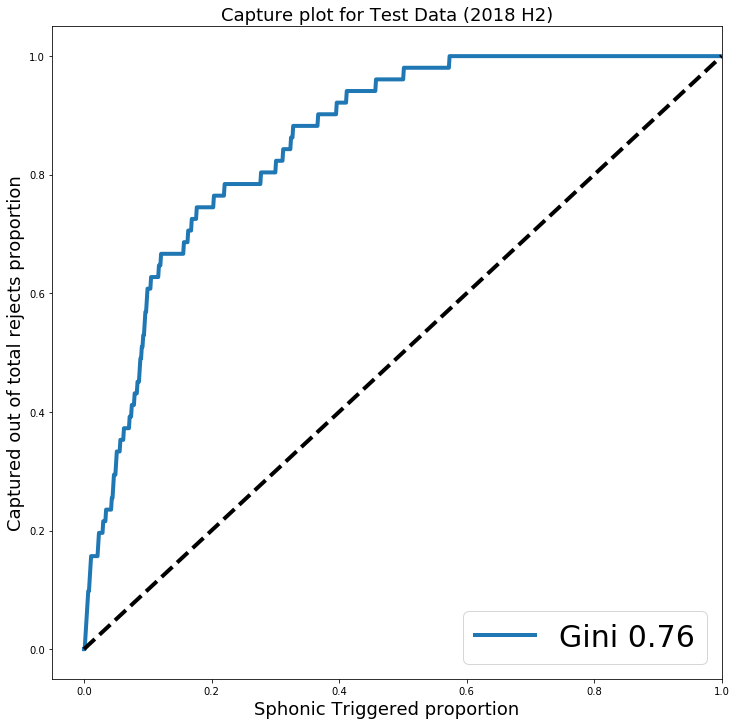

In [55]:
Capture_curve(oot_act,oot_pred,round(test_gini,2),'Test Data (2018 H2)')

## Train

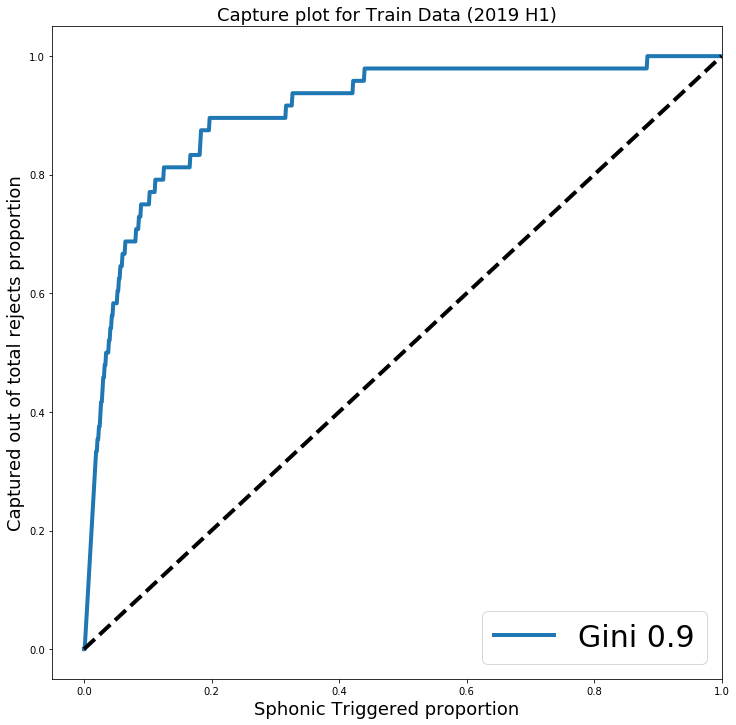

In [56]:
Capture_curve(insample_act,insample_pred,round(train_gini,2),'Train Data (2019 H1)')

## Feature Importance

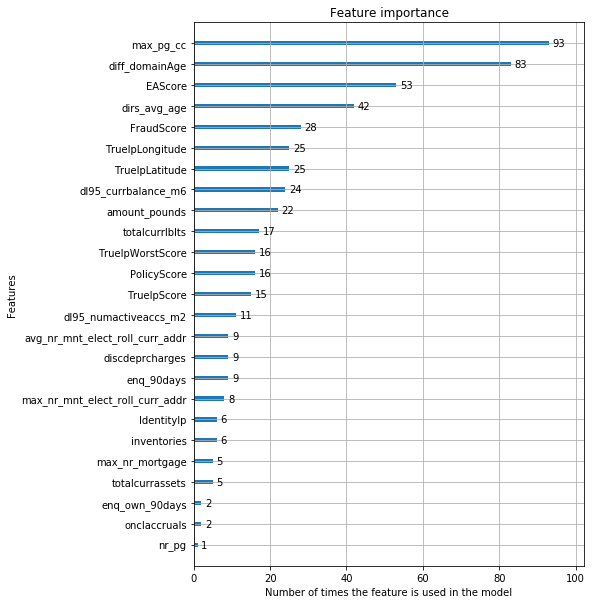

In [57]:
lgb.plot_importance(lgbm_model_best_hyperparam, importance_type='split', title='Feature importance', xlabel='Number of times the feature is used in the model', figsize=(7,10))



### Test after excluding Gen 6.5 score > 0.2

In [58]:
# Number of unique application_uuid in each dataset
print(df_gen65_score['application_uuid'].nunique())
print(df_gen65_score_wenjun['application_uuid'].nunique())
print(df_gen65_score_monitoring['application_uuid'].nunique())

229303
317583
74757


In [59]:
# Creating dataframes for final merging of datasets
df_gen65_score_f=df_gen65_score[['application_uuid','final_score']]
df_gen65_score_wenjun_f=df_gen65_score_wenjun[['application_uuid','gen65_score_wenjun']]
df_gen65_score_monitoring_f=df_gen65_score_monitoring[['application_uuid','gen65_score_monitoring']]

In [60]:
df_merge_gen65_wenjun=df_gen65_score_f.merge(df_gen65_score_wenjun_f,how='outer',on='application_uuid')
print(df_merge_gen65_wenjun.shape)
df_merged_final=df_merge_gen65_wenjun.merge(df_gen65_score_monitoring_f,how='outer',on='application_uuid')
print(df_merged_final.shape)

(318095, 3)
(327444, 4)


In [61]:
print(df_merged_final.shape)
df_merged_final.head()

(327444, 4)


,application_uuid,final_score,gen65_score_wenjun,gen65_score_monitoring
0,0fd4ae42-1119-4849-8f7c-7c14a455a26e,0.065182,0.065182,0.065182
1,0fd4dbe3-104a-470c-b9c0-761706305961,0.206053,0.206053,NaN
2,0fd4f0a2-3b74-48cc-90d2-988d17414ce1,0.068732,0.068732,0.068732
3,0fd5775c-95e5-490f-8d6e-07786a7af620,0.017880,0.017880,NaN
4,0fd5a1b5-59f5-4d39-90c5-0ac5609d6ba7,0.021004,0.021004,NaN


In [62]:
df_merged_final_copy=df_merged_final.copy()

In [63]:
df_merged_final_copy['gen65_score_combined'] = np.where(df_merged_final_copy["final_score"].isnull(), (np.where(df_merged_final_copy["gen65_score_wenjun"].isnull(), df_merged_final_copy["gen65_score_monitoring"], df_merged_final_copy["gen65_score_wenjun"])), df_merged_final_copy["final_score"])
df_merged_final_copy.head()



,application_uuid,final_score,gen65_score_wenjun,gen65_score_monitoring,gen65_score_combined
0,0fd4ae42-1119-4849-8f7c-7c14a455a26e,0.065182,0.065182,0.065182,0.065182
1,0fd4dbe3-104a-470c-b9c0-761706305961,0.206053,0.206053,NaN,0.206053
2,0fd4f0a2-3b74-48cc-90d2-988d17414ce1,0.068732,0.068732,0.068732,0.068732
3,0fd5775c-95e5-490f-8d6e-07786a7af620,0.017880,0.017880,NaN,0.017880
4,0fd5a1b5-59f5-4d39-90c5-0ac5609d6ba7,0.021004,0.021004,NaN,0.021004


In [64]:
print(df_merged_final_copy[df_merged_final_copy['gen65_score_combined']>0.2].shape)
print(df_merged_final_copy[df_merged_final_copy['gen65_score_combined']<=0.2].shape)
print(df_merged_final_copy[df_merged_final_copy['gen65_score_combined'].isnull()].shape)

(31724, 5)
(214676, 5)
(81044, 5)


In [65]:
print(df_merged_final_copy[df_merged_final_copy['gen65_score_combined']>0.2]['application_uuid'].nunique())
print(df_merged_final_copy[df_merged_final_copy['gen65_score_combined']<=0.2]['application_uuid'].nunique())
print(df_merged_final_copy[df_merged_final_copy['gen65_score_combined'].isnull()]['application_uuid'].nunique())

31724
214676
81044


In [66]:
Apps_Gen65_gt20score= list(df_merged_final_copy[df_merged_final_copy['gen65_score_combined']>0.2]['application_uuid'].unique())
test_1=test[~test.application_uuid.isin(Apps_Gen65_gt20score)]
test_1.shape


(886, 741)

In [67]:
Apps_Gen65_gt20score= list(df_merged_final_copy[df_merged_final_copy['gen65_score_combined']>0.2]['application_uuid'].unique())
train_1=train[~train.application_uuid.isin(Apps_Gen65_gt20score)]
train_1.shape


(1214, 741)

In [68]:
# Data for independent and target variables

X_insample_1   = train_1[feature_set]
X_oot_1        = test_1[feature_set]
insample_act_1 = train_1['cifas_rej_sf']
oot_act_1      = test_1['cifas_rej_sf']


In [69]:
# insample_pred = lgbm_model_for_cum_gain.predict(X_insample,num_iteration=lgbm_model_for_cum_gain.best_iteration)
oot_pred_1 = lgbm_model_best_hyperparam.predict(X_oot_1,num_iteration=lgbm_model_best_hyperparam.best_iteration)

In [70]:
# Test Gini after excluding applications which are having Gen 6.5 score > 0.2

test_gini_1 = gini_calc(test_1['sphonic_rej_sf'],oot_pred_1)
print(round(test_gini_1,2))

0.76


## Code for checking Gini for Future Predictions

In [71]:
Sphonic_ltet50k_model = pickle.load(open('sphonic_ltet50k_model_100_3_0.05_0.5_2019-09-11 12:27:37.491778.pickle', 'rb'))
future_oot_pred_test = Sphonic_ltet50k_model.predict(X_oot)
# print(future_oot_pred_test)


In [72]:
test_gini_test = gini_calc(test['sphonic_rej_sf'],future_oot_pred_test)
print(round(test_gini_test,2))

0.76


## borrower_type wise Model Performance

In [114]:
oot_act_brrwrtype_New=sorted_results[sorted_results['borrower_type']=='New']['sphonic_rej_sf']
oot_act_brrwrtype_Returning=sorted_results[sorted_results['borrower_type']=='Returning']['sphonic_rej_sf']
oot_act_brrwrtype_Existing=sorted_results[sorted_results['borrower_type']=='Existing']['sphonic_rej_sf']

In [113]:
oot_pred_New=sorted_results[sorted_results['borrower_type']=='New']['preds']
oot_pred_Returning=sorted_results[sorted_results['borrower_type']=='Returning']['preds']
oot_pred_Existing=sorted_results[sorted_results['borrower_type']=='Existing']['preds']

In [112]:
test_gini_brrwrtype_New = gini_calc(oot_act_brrwrtype_New,oot_pred_New)
print(round(test_gini_brrwrtype_New,2))

0.73


In [117]:
test_gini_brrwrtype_Returning = gini_calc(oot_act_brrwrtype_Returning,oot_pred_Returning)
print(round(test_gini_brrwrtype_Returning,2))

0.71


In [118]:
test_gini_brrwrtype_Existing = gini_calc(oot_act_brrwrtype_Existing,oot_pred_Existing)
print(round(test_gini_brrwrtype_Existing,2))

0.95


In [120]:
#New Customers
sorted_results_New=sorted_results[sorted_results['borrower_type']=='New']
#Returning Customers
sorted_results_Returning=sorted_results[sorted_results['borrower_type']=='Returning']
#Existing Customers
sorted_results_Existing=sorted_results[sorted_results['borrower_type']=='Existing']

In [124]:
df_decile_cutoff_New=decile_cutoff_fraud_detected_perc(sorted_results_New)
df_decile_cutoff_New
# df_decile_cutoff_Returning=decile_cutoff_fraud_detected_perc(sorted_results_Returning)
# df_decile_cutoff_Returning
# df_decile_cutoff_Existing=decile_cutoff_fraud_detected_perc(sorted_results_Existing)
# df_decile_cutoff_Existing

,application_percentage,fraud_percentage
0,10,40.0
1,20,80.0
2,30,84.0
3,40,84.0
4,50,88.0
5,60,96.0
6,70,100.0
7,80,100.0
8,90,100.0
9,100,100.0
